In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

---------------------------

# Python Programming for Ocean Management: Real-time mapping of the fishing footprint in Atlantic Canada



Python Tutorial for Internation Ocean Institute (class 2018)

---------------------------

## Case study: Real-time mapping of the fishing footprint is support of concervation of North Atlantic Right 

---------------------------

### North Atlantic Right Whale (*Eubalaena glacialis*) - Only ~400 individuals left!

![alt text](images/rightwhalewdiver.jpg)

-----------------------

### Entaglement with fishing gear is one of the causes of mortality

![alt text](images/180201-eac-va-right-whale-entangled-sea-to-shore.jpg)

------------------------------

# VMS (Vessel Monitoring System)

Satellite trasnponder than many fishing vessels are required to carry.

![alt text](images/0000018_romtrax-wi-fi-vms_550.jpeg)

![alt text](images/vessel-monitoring-aid-kkp.jpg)



------------------
# Whale sightings

Take a look to `whale_sightings.csv`

In [2]:
import pandas as pd

whales = pd.read_csv('whale_sightings.csv')

whales

,Date,Latitude,Longitude,Number of right whales
0,2018-05-31,47.59990,-64.098750,1
1,2018-05-27,48.15185,-63.381437,1
2,2018-05-24,44.58650,-63.058000,1
3,2018-05-24,44.63517,-62.678800,1



------------------
### Very basic "mapping" (non projected) of whale data


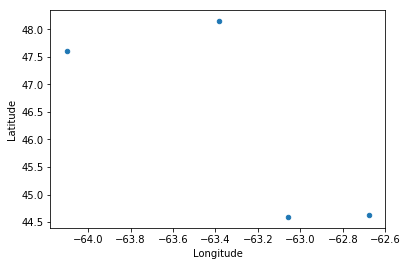

In [3]:
whales.plot(x='Longitude',y='Latitude',kind='scatter')

------------------
### "Projected" mapping of whale data: Adding land


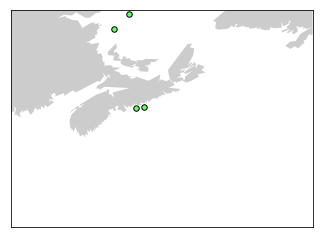

In [4]:
from mpl_toolkits.basemap import Basemap

# Create map
m = Basemap(projection='mill',
            llcrnrlat=39.9,
            urcrnrlat=48.3,
            llcrnrlon=-69,
            urcrnrlon=-54.7,
            resolution='l')

x, y = m(whales['Longitude'].values,whales['Latitude'].values)

cs = m.scatter(x,y,s=30,marker='o',color='#66ff66', edgecolor='k')

m.fillcontinents()

### Packaging of mapping code iito a "Function" for easy reuse

In [5]:
def make_basemap():    
    from mpl_toolkits.basemap import Basemap

    # Create map
    m = Basemap(projection='mill',
                llcrnrlat=39.9,
                urcrnrlat=48.3,
                llcrnrlon=-69,
                urcrnrlon=-54.7,
                resolution='l')
    
    m.fillcontinents()
    return m



def plot_whales(whales, m):    
    x, y = m(whales['Longitude'].values,whales['Latitude'].values)

    cs = m.scatter(x,y,s=60,marker='o',color='#66ff66', edgecolor='k',zorder=50)
    return

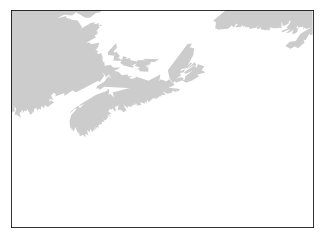

In [6]:
make_basemap()

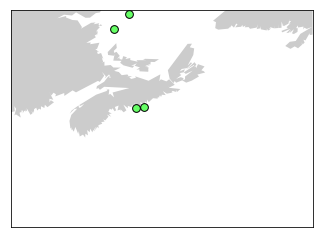

In [7]:
make_basemap()
plot_whales(whales, m)

### Tweaking our "Function" to make a nicer basemap

In [46]:
def make_basemap():
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    
    fig1 = plt.figure(figsize=(13,10))

    # Create map
    m = Basemap(projection='mill',
                llcrnrlat=39.9,
                urcrnrlat=48.3,
                llcrnrlon=-69,
                urcrnrlon=-54.7,
                resolution='i')
    
    m.drawcoastlines(color='#a6a6a6',linewidth=0.5,zorder=42)
    m.fillcontinents(color='#e6e6e6',zorder=42)
    m.drawmapboundary()
    plt.tight_layout()
    return m

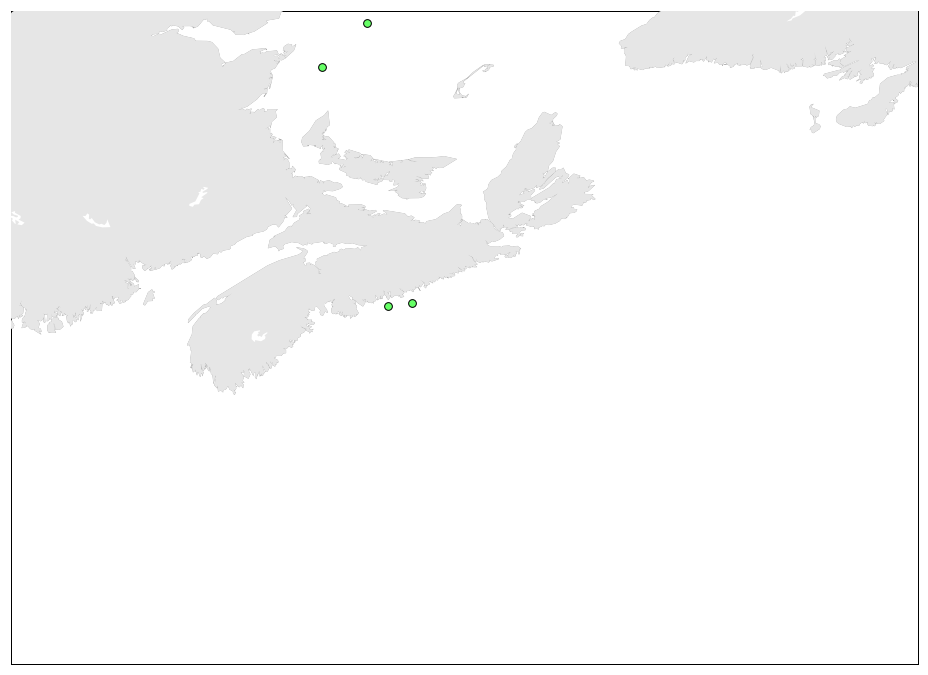

In [49]:
m = make_basemap()
plot_whales(whales, m)

<IPython.core.display.Javascript object>


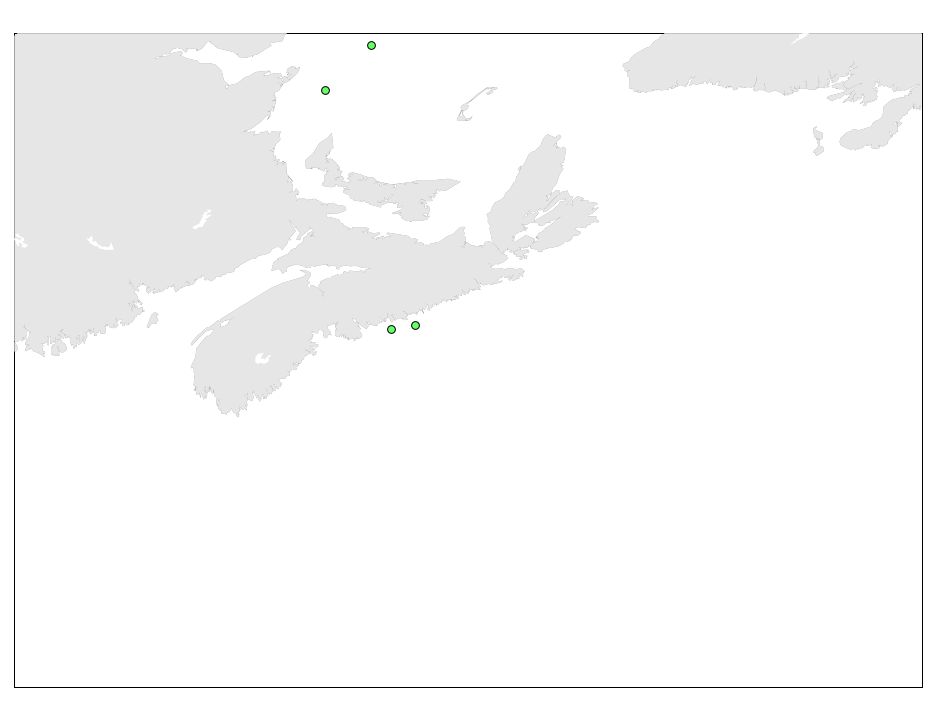

In [50]:
%matplotlib notebook
m = make_basemap()
plot_whales(whales, m)

----------------------
## Importing functions from an external file (i.e. `my_fucntions.py`):

### Adding the "Maritimes Region" polygon

<IPython.core.display.Javascript object>


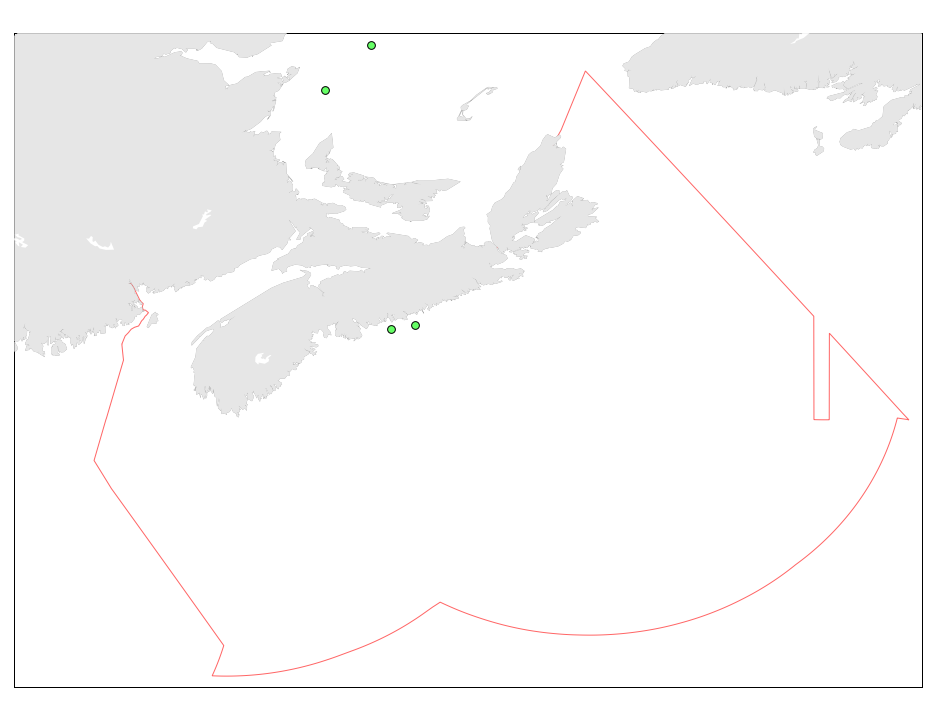

In [51]:
import my_functions as mf

m = make_basemap()
plot_whales(whales, m)

mf.add_maritimes_region(m)

In [12]:
import importlib
importlib.reload(mf)

<module 'my_functions' from 'C:\\Users\\IbarraD\\TEST\\test\\my_functions.py'>

----------------------

### Adding the "NAFO subregions" polygons

<IPython.core.display.Javascript object>


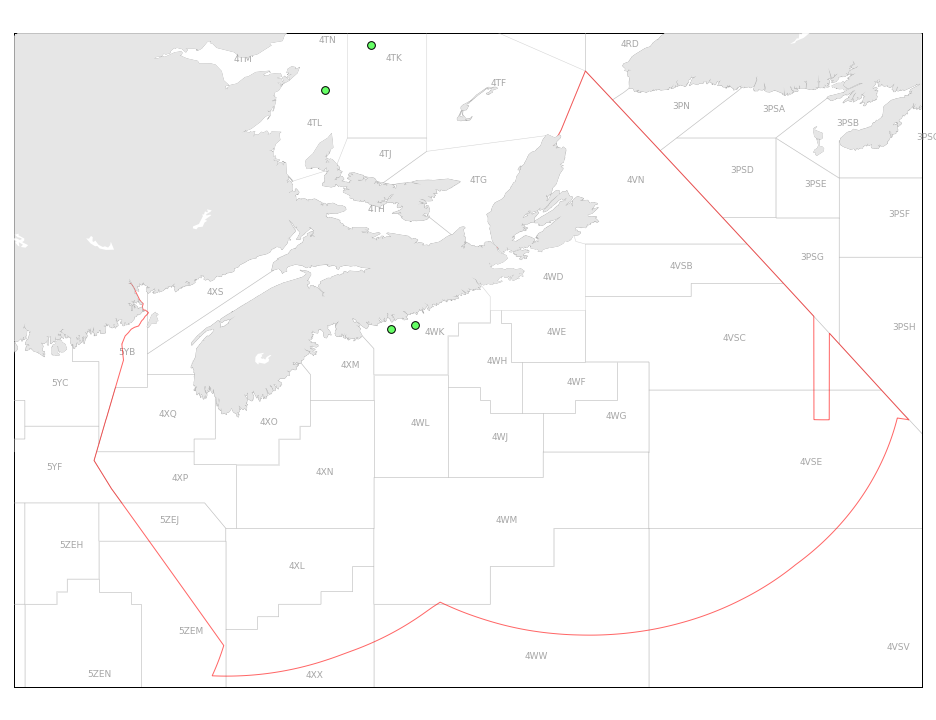

In [52]:
m = make_basemap()
plot_whales(whales,m)
mf.add_maritimes_region(m)
mf.add_NAFO_areas(m)

----------------------

### Make a function to download bathymetry (from ERDDAP server) and ad it to basemap


In [53]:
def add_bathymetry(m):
    import matplotlib.pyplot as plt
    import netCDF4
    import urllib.request
    import numpy as np
    bathymetry_file = 'usgsCeSrtm30v6.nc'

    minlat=39.9
    maxlat=48.3
    minlon=-69
    maxlon=-54.7
    
    isub = 1
    base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?'
    query='topo[(%f):%d:(%f)][(%f):%d:(%f)]' % (maxlat,isub,minlat,minlon,isub,maxlon)
    url = base_url+query
    # store data in NetCDF file
    urllib.request.urlretrieve(url, bathymetry_file)

    # open NetCDF data in
    nc = netCDF4.Dataset(bathymetry_file)
    ncv = nc.variables
    lon = ncv['longitude'][:]
    lat = ncv['latitude'][:]
    lons, lats = np.meshgrid(lon, lat)
    topo = ncv['topo'][:, :]
    
    TOPOmasked = np.ma.masked_where(topo>0,topo)

    # For topo
    x, y = m(lons, lats)
    plt.pcolormesh(x,y,TOPOmasked,cmap=plt.get_cmap('Blues_r'),zorder=5,vmax=2000)

    depth_levels_1 = np.linspace(topo.min(), -700, num=5)

    depth_levels = np.append(depth_levels_1,np.linspace(-650, -50, num=15))

    depth_levels = depth_levels.tolist()

    cs = plt.contour(
        x,
        y,
        topo,
        depth_levels,
        cmap=plt.get_cmap('Blues_r'),
        linewidths=0.3,
        linestyles='solid',
        zorder=19)
    return



Use our new `add_bathymetry` fuction


<IPython.core.display.Javascript object>


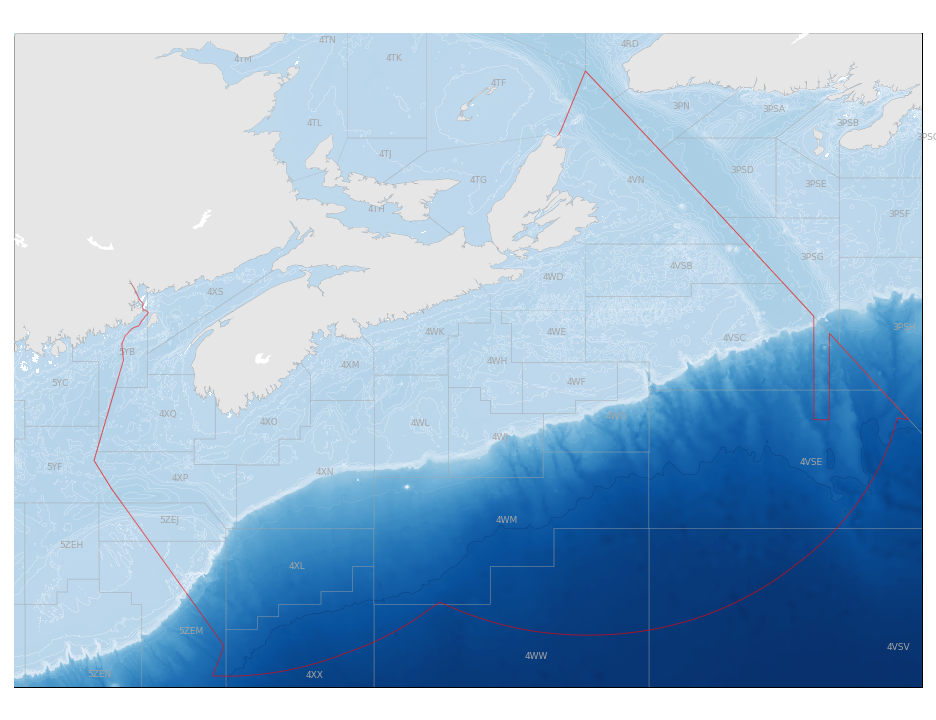

In [54]:
m = make_basemap()

#plot_whales(whales,m)
mf.add_maritimes_region(m)
mf.add_NAFO_areas(m)
add_bathymetry(m)

import _pickle as pickle
pickle.dump(m, open('basemap.p', 'wb'), -1)

<IPython.core.display.Javascript object>


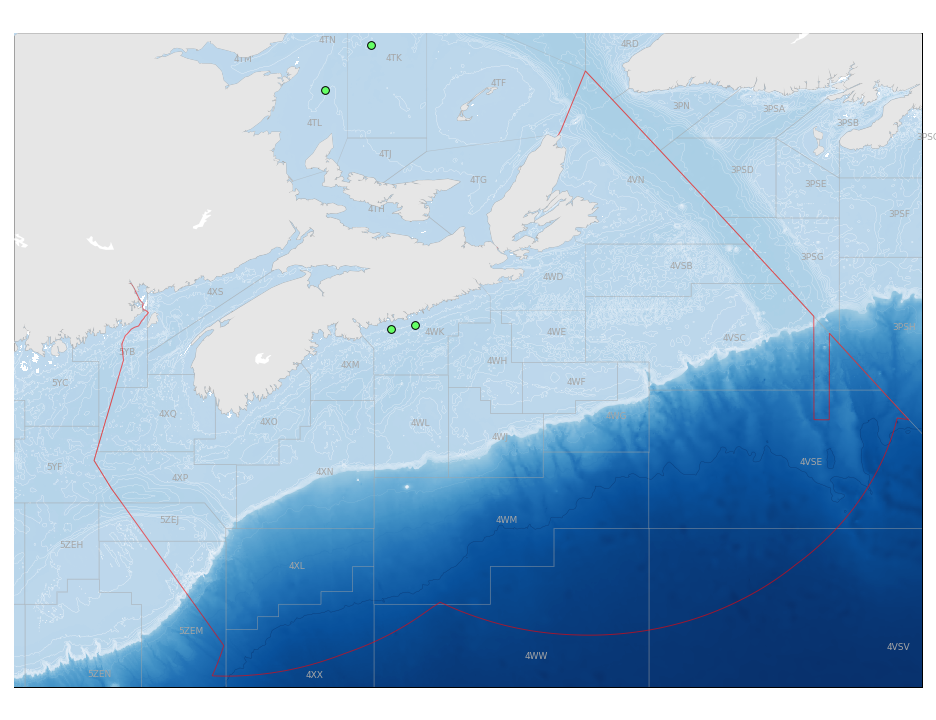

In [55]:
m = pickle.load(open('basemap.p','rb'))

plot_whales(whales,m)

------------------
Save basemap with pickle

------------------

------------------
OPen basemap, replot whales

------------------


------------------
# VMS

------------------

In [59]:
#vms_csv = r'C:\Users\IbarraD\Data\VMS_DFO_Oracle\data_original\vms_autoDownloaded.csv'
vms_csv = 'vms_autoDownloaded.csv'

fishing = pd.read_csv(vms_csv)

fishing

,VR_NUMBER,LATITUDE,LONGITUDE,POSITION_UTC_DATE
0,105912,42.083000,-66.652000,2018-05-25 06:00:01
1,106604,42.130820,-66.917840,2018-05-25 06:00:01
2,107314,43.441650,-65.208410,2018-05-25 06:00:01
3,101019,43.744230,-65.317730,2018-05-25 06:00:01
4,100247,44.477891,-63.600112,2018-05-25 06:00:01
5,107918,44.478235,-63.599082,2018-05-25 06:00:01
6,103677,44.632472,-65.747166,2018-05-25 06:00:01
7,104994,44.729118,-63.008567,2018-05-25 06:00:01
8,7488,44.736580,-62.830900,2018-05-25 06:00:01
9,106311,44.907302,-65.867158,2018-05-25 06:00:01


------------------
OPen basemap, replot VMS

------------------

<IPython.core.display.Javascript object>


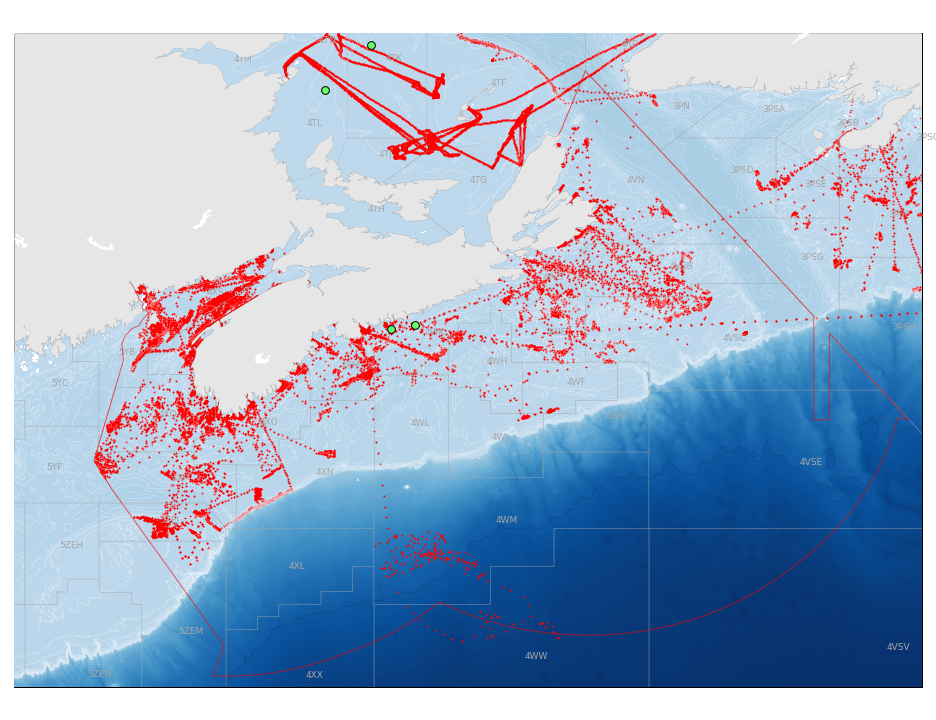

In [60]:
import matplotlib.pyplot as plt

m = pickle.load(open('basemap.p','rb'))

x, y = m(fishing['LONGITUDE'].values,fishing['LATITUDE'].values)

plt.scatter(x,y,s=1,marker='o',color='r',  zorder=10)


plot_whales(whales,m)

In [61]:
def make_heatmap(info, m, data):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    x = np.arange(info['minlon'], info['maxlon'], info['bin_size'], dtype=np.float64)
    y = np.arange(info['minlat'], info['maxlat'], info['bin_size'], dtype=np.float64)
    
    info['bin_number'] = (np.ceil((info['maxlon'] - info['minlon'])/info['bin_size']),
                            np.ceil((info['maxlat'] - info['minlat'])/info['bin_size']))
    
    x,y = m(data['LONGITUDE'].values, data['LATITUDE'].values)
    
    H, xedges, yedges = np.histogram2d(x,y,bins=300)
    # Rotate and flip H...
    H = np.rot90(H)
    H = np.flipud(H)
     
    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H)
     
    # Log H for better display
    Hmasked = np.log10(Hmasked)
     
    # Make map
    cs = m.pcolor(xedges,yedges,Hmasked,cmap=plt.get_cmap('inferno_r'), zorder=49)
    
    return

<IPython.core.display.Javascript object>


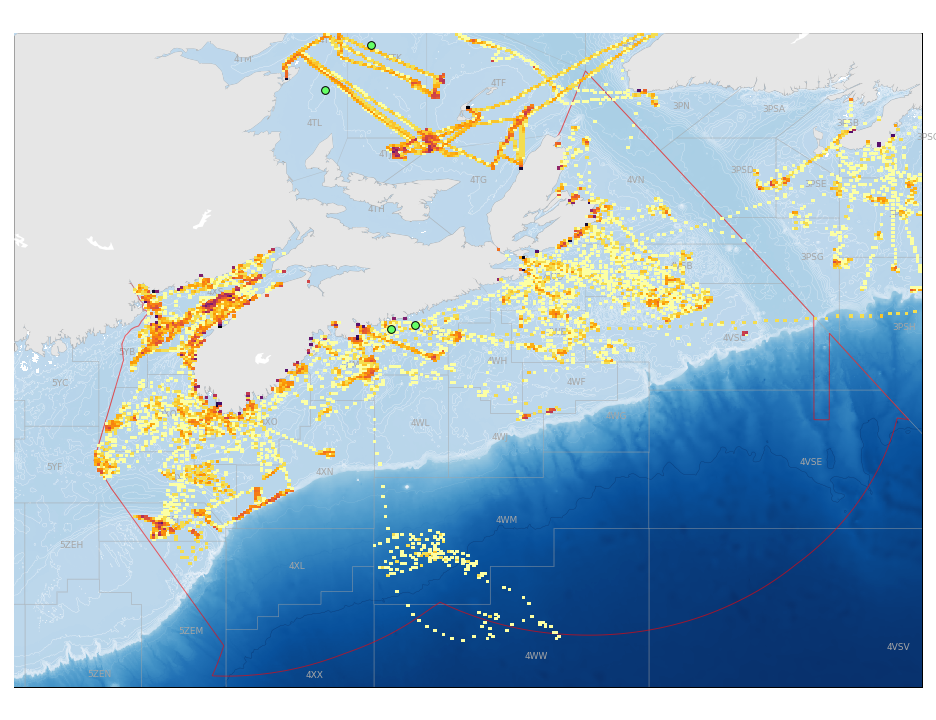

In [62]:
#from gridder import make_heatmap

info = {}
info['minlat'] = 39.9
info['maxlat'] = 48.3
info['minlon'] = -69
info['maxlon'] = -54.7
info['bin_size'] = 0.01 # Degrees

m = pickle.load(open('basemap.p','rb'))

plot_whales(whales,m)

make_heatmap(info, m, fishing)


------------------
Filter by speed

------------------

In [ ]:
type(fishing['POSITION_UTC_DATE'])

In [63]:
from datetime import datetime
import numpy as np
import my_functions as mf

VR_NUMBER, LATITUDE, LONGITUDE, POSITION_UTC_DATE, SPEED_KNOTS = [],[],[],[],[]

unis = pd.unique(fishing['VR_NUMBER'])

for ship in unis:
    singleship = fishing[fishing['VR_NUMBER'] == ship].reset_index()
    
    if len(singleship) > 1:
    
        for i in range(1,len(singleship)):

            startdate = datetime.strptime(singleship['POSITION_UTC_DATE'][i-1], '%Y-%m-%d %H:%M:%S')
            enddate = datetime.strptime(singleship['POSITION_UTC_DATE'][i], '%Y-%m-%d %H:%M:%S')

            elapsed_time = enddate-startdate
            elapsed_distance = mf.distance(singleship['LATITUDE'][i-1],
                                        singleship['LONGITUDE'][i-1],
                                        singleship['LATITUDE'][i],
                                        singleship['LONGITUDE'][i]) / 1852
            
            if elapsed_time.seconds > 0:
                speed = elapsed_distance / (elapsed_time.seconds / 3600)
            else:
                speed = np.nan
                    

            VR_NUMBER.append(singleship['VR_NUMBER'][i])
            LATITUDE.append(singleship['LATITUDE'][i])
            LONGITUDE.append(singleship['LONGITUDE'][i])
            POSITION_UTC_DATE.append(singleship['POSITION_UTC_DATE'][i])
            SPEED_KNOTS.append(speed)

fishing2 = pd.DataFrame({'VR_NUMBER':VR_NUMBER,
                        'LATITUDE':LATITUDE,
                        'LONGITUDE':LONGITUDE,
                        'POSITION_UTC_DATE':POSITION_UTC_DATE,
                        'SPEED_KNOTS':SPEED_KNOTS})

fishing2
    

,VR_NUMBER,LATITUDE,LONGITUDE,POSITION_UTC_DATE,SPEED_KNOTS
0,105912,42.08350,-66.65100,2018-05-25 06:02:00,1.625424
1,105912,42.08171,-66.68130,2018-05-25 07:00:00,1.401168
2,105912,42.08200,-66.68500,2018-05-25 07:02:00,4.973811
3,105912,42.08202,-66.68178,2018-05-25 08:00:00,0.148440
4,105912,42.08200,-66.67450,2018-05-25 08:02:00,9.732234
5,105912,42.08092,-66.65481,2018-05-25 09:00:00,0.910149
6,105912,42.08050,-66.65200,2018-05-25 09:02:00,3.832003
7,105912,42.08095,-66.65569,2018-05-25 10:00:00,0.172385
8,105912,42.08100,-66.66000,2018-05-25 10:02:00,5.762562
9,105912,42.08086,-66.68645,2018-05-25 11:00:01,1.218988


<IPython.core.display.Javascript object>


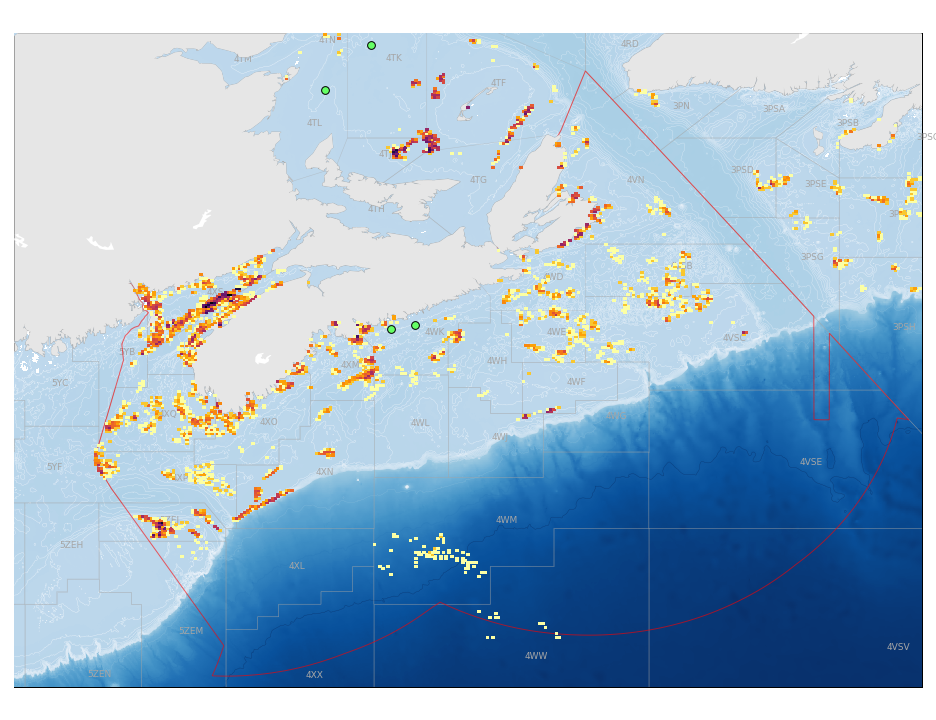

In [64]:
fishing3 = fishing2[(fishing2['SPEED_KNOTS']>0.5) & (fishing2['SPEED_KNOTS']<4.5)]

m = pickle.load(open('basemap.p','rb'))

plot_whales(whales,m)

make_heatmap(info, m, fishing3)

In [ ]:
import my_functions as mf

------------------
Install ship_mapper

------------------

------------------
Use ship_mapper to make fishing density heatmap

------------------

------------------
Supperimpose whale locations

------------------

------------------

# Set stage
whales get entangled


Whales get sotted by planes, ships, and gliders.


https://environmental-action.org/wp-content/uploads/2018/02/180201-eac-va-right-whale-entangled-sea-to-shore.jpg

https://whalesandmarinefauna.files.wordpress.com/2013/01/628x471_004.jpg

http://mediad.publicbroadcasting.net/p/mpbn/files/styles/x_large/public/201805/12683617055_5f20872e81_k.jpg

https://media.mnn.com/assets/images/2017/12/TangledNorthAtlanticRightWhale.jpg




spoter planes
https://pbs.twimg.com/media/DdVa8ltX0AEo10V.jpg

https://assets.skiesmag.com/images/online/MaritimeProtector/1.jpg

https://assets.skiesmag.com/images/online/MaritimeProtector/4.jpg

http://www.releases.gov.nl.ca/releases/2013/fishaq/1216n04_pic.jpg

https://ssl.c.photoshelter.com/img-get2/I0000jNrkh7emj4Q/fit=1000x750/GSBCAN0401005.jpg

https://cdn.planespotters.net/photo/131000/original/c-gcfj-canada-transport-canada-de-havilland-canada-dhc-8-102-dash-8_PlanespottersNet_131307_cbd5848763.jpg

http://imgproc.airliners.net/photos/airliners/5/7/1/2711175.jpg?v=v40


https://twitter.com/FishOceansCAN/status/991054848538923008



Spoter vessels
CCGS Corporal McLaren M.M.V.
https://navaltoday.com/wp-content/uploads/2015/05/Canadian-Coast-Guard-Expands-Fleet.jpg

http://www.ccg-gcc.gc.ca/Vessel-Procurement/Gallery

------------------

------------------

Present the data (I think it is better to do this bit by bit... present each data set just before it is used)

- VMS data
http://cawebstore.romcomm.com/romtrax-wi-fi-vms-2

https://www.google.ca/imgres?imgurl=http%3A%2F%2Fsahabatmancing.com%2Fwp-content%2Fuploads%2F2017%2F08%2Fvessel-monitoring-aid-kkp.jpg&imgrefurl=http%3A%2F%2Fsahabatmancing.com%2Fupdates%2Fkkp-kini-punya-alat-pantau-kapal-perikanan-secara-real-time%2F&docid=G33MUa4MuPLA0M&tbnid=s3lhl5EeLQVv9M%3A&vet=1&w=800&h=444&bih=984&biw=1920&ved=2ahUKEwjhz_DLubLbAhUMzoMKHbBdDvIQxiAoA3oECAEQFw&iact=c&ictx=1

- WHale possitions

- PLane surveys

- Glider surveys

------------------